In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import dfply

In [42]:
import pandas as pd
import requests
import numpy as np

def get_structures(
    county              = None,
    division            = None,
    gnis_id             = None,
    water_district      = None,
    wdid                = None,
    api_key             = None
    ):

    #  base API URL
    base = "https://dwr.state.co.us/Rest/GET/api/v2/structures/?"

    # if wdid is not None:
    # if a list of WDIDs, collapse list
    if type(wdid) == list:

        wdid = [str(x) for x in wdid]

        # join list of county names into single string seperated by plus sign
        wdid = "%2C+".join(wdid)
    
        # replace white space w/ plus sign
        wdid  = wdid.replace(" ", "%2C+")

        # print("collapsed list of wdids")
        # print(wdid)
    else:
        # if wdid is an int or float, convert to string
        if type(wdid) == int or type(wdid) == float:
            wdid = str(wdid)
            print("converted int/float to string")
            print(wdid)
        if type(wdid) == str:
            # replace white space w/ plus sign
            wdid  = wdid.replace(" ", "%2C+")
            # print("replacing string whitespace")
            # print(wdid)
    # else:
    #     return "Error, Nonetype input"

    # maximum records per page
    page_size  = 50000
    # page_size  = 100

    # initialize empty dataframe to store data from multiple pages
    data_df    = pd.DataFrame()

    # initialize first page index
    page_index = 1

    # Loop through pages until there are no more pages to get
    more_pages = True
    
    # Loop through pages until last page of data is found, binding each responce dataframe together
    while more_pages == True:

        # create string tuple
        url = (base, 
        "format=json&dateFormat=spaceSepToSeconds",
        "&county=", (county),
        "&division=", (division),
        "&gnisId=", (gnis_id),
        "&waterDistrict=", (water_district),
        "&wdid=", (wdid),
        "&pageSize=", str(page_size),
        "&pageIndex=", str(page_index)
        )
        
        # concatenate non-None values into query URL
        url = [x for x in url if x is not None]
        url = "".join(url)

        # If an API key is provided, add it to query URL
        if api_key is not None:
            # Construct query URL w/ API key
            url = url + "&apiKey=" + str(api_key)
        
        # make API call
        cdss_req = requests.get(url)

        # extract dataframe from list column
        cdss_df  = cdss_req.json() 
        cdss_df  = pd.DataFrame(cdss_df)
        cdss_df  = cdss_df["ResultList"].apply(pd.Series) 

        # bind data from this page
        data_df = pd.concat([data_df, cdss_df])
        
        # Check if more pages to get to continue/stop while loop
        if(len(cdss_df.index) < page_size): 
            more_pages = False
        else:
            page_index += 1

    return data_df

In [49]:
["0100529", "0100553"]
struc = get_structures(wdid = "0100529")

In [44]:
struc = get_structures(county = "Adams")

In [ ]:
struc = get_structures(wdid = "Adams")

In [29]:
county = "adams"
# county              = None
division            = None
gnis_id             = None
water_district      = None
wdid                = None
api_key             = None
#  base API URL
base = "https://dwr.state.co.us/Rest/GET/api/v2/structures/?"

# if county is None:
#     county         = ""
# if wdid is None:
#     wdid           = ""
# if division is None:
#     division       = ""
# if gnis_id is None:
#     gnis_id        = ""
# if water_district is None:
#     water_district = ""
    
if wdid is not None:
    # if a list of WDIDs, collapse list
    if type(wdid) == list:

        wdid = [str(x) for x in wdid]

        # join list of county names into single string seperated by plus sign
        wdid = "%2C+".join(wdid)
    
        # replace white space w/ plus sign
        wdid  = wdid.replace(" ", "%2C+")

        # print("collapsed list of wdids")
        # print(wdid)
    else:
        # if wdid is an int or float, convert to string
        if type(wdid) == int or type(wdid) == float:
            wdid = str(wdid)
            print("converted int/float to string")
            print(wdid)
        if type(wdid) == str:
            # replace white space w/ plus sign
            wdid  = wdid.replace(" ", "%2C+")
            # print("replacing string whitespace")
            # print(wdid)
# else:
    # print()"Error, Nonetype input"



In [40]:

# maximum records per page
page_size  = 50000
# page_size  = 100

# initialize empty dataframe to store data from multiple pages
data_df    = pd.DataFrame()

# initialize first page index
page_index = 1

# Loop through pages until there are no more pages to get
more_pages = True

# Loop through pages until last page of data is found, binding each responce dataframe together
# while more_pages == True:
# create string tuple
url = (base, 
    "format=json&dateFormat=spaceSepToSeconds",
    "&county=", (county),
    "&division=", (division),
    "&gnisId=", (gnis_id),
    "&waterDistrict=", (water_district),
    "&wdid=", (wdid),
    "&pageSize=", str(page_size),
    "&pageIndex=", str(page_index)
)

# concatenate non-None values into query URL
url = [x for x in url if x is not None]
url = "".join(url)


In [41]:
url

'https://dwr.state.co.us/Rest/GET/api/v2/structures/?format=json&dateFormat=spaceSepToSeconds&county=adams&division=&gnisId=&waterDistrict=&wdid=&pageSize=50000&pageIndex=1'

In [27]:

# If an API key is provided, add it to query URL
if api_key is not None:
    # Construct query URL w/ API key
    url = url + "&apiKey=" + str(api_key)

# make API call
cdss_req = requests.get(url)

# extract dataframe from list column
cdss_df  = cdss_req.json() 
cdss_df  = pd.DataFrame(cdss_df)
cdss_df  = cdss_df["ResultList"].apply(pd.Series) 

# bind data from this page
data_df = pd.concat([data_df, cdss_df])

# Check if more pages to get to continue/stop while loop
if(len(cdss_df.index) < page_size): 
    more_pages = False
else:
    page_index += 1

# return data_df

In [28]:
cdss_df

,wdid,structureName,associatedAkas,ciuCode,structureType,waterSource,gnisId,streamMile,associatedCaseNumbers,associatedPermits,...,coordsew,coordsewDir,coordsns,coordsnsDir,utmX,utmY,latdecdeg,longdecdeg,locationAccuracy,modified
0,0100529,BADGER CREEK DITCH 1,None,H,DITCH,BEAVER CREEK,00182928,53.15,"01CW0273, CA2142",None,...,NaN,None,NaN,None,609496.6,4427378.7,39.989500,-103.717458,Spotted from quarters,2007-02-13 08:06:00
1,0100553,BARNHOUSE DITCH,None,H,DITCH,ANTELOPE CREEK,00180822,25.69,"01CW0273, CA2142",None,...,NaN,None,NaN,None,573467.7,4425942.4,39.980462,-104.139578,Spotted from quarters,2007-02-13 08:11:00
2,0100555,BRAMKAMP DITCH,None,A,DITCH,MUDDY CREEK,00180913,31.77,CA0433,None,...,2904.0,W,450.0,N,583201.0,4410451.0,39.840003,-104.027574,Digitized,2012-05-10 14:39:42
3,0100556,MOORE DITCH,None,A,DITCH,MUDDY CREEK,00180913,20.26,"CA0433, CA2142",None,...,1275.0,E,3287.0,S,583635.0,4421248.0,39.937227,-104.021119,Digitized,2012-05-08 13:59:11
4,0100560,ADAMS DITCH PIPELINE,None,I,PIPELINE,BIJOU CREEK,00180770,45.34,"01CW0273, CA2142",None,...,NaN,None,NaN,None,574079.1,4408650.5,39.824627,-104.134380,Spotted from quarters,1999-02-18 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3635,0803837,BARR LAKE,None,F,RESERVOIR,SOUTH PLATTE RIVER,00201759,NaN,None,None,...,NaN,None,NaN,None,NaN,NaN,NaN,NaN,None,1997-08-27 00:00:00
3636,0809487,ROCKY MNT ARSENAL SEC 8W,None,U,WELL,GROUNDWATER: SOUTH PLATTE RIVER,00201759,NaN,W9164-77,None,...,NaN,None,NaN,None,517683.4,4406787.7,39.810889,-104.793416,Spotted from quarters,2007-12-24 10:54:04
3637,0814174,AURORA LFH W 58584-F,None,U,WELL,GROUNDWATER: LARAMIE FOX HILLS,None,NaN,None,"57564-F, 58584-F",...,146.0,E,1513.0,S,527519.5,4399425.1,39.744289,-104.678817,Spotted from section lines,2007-05-31 07:32:00
3638,0814175,AURORA LAR W 58585-F,None,U,WELL,GROUNDWATER: LOWER ARAPAHOE,None,NaN,None,"57563-F, 58585-F",...,142.0,E,1563.0,S,527520.6,4399440.3,39.744424,-104.678793,Spotted from section lines,2007-05-31 07:32:00


In [6]:
struct = get_structures(county = "adams")

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [2]:
url = "https://dwr.state.co.us/Rest/GET/api/v2/referencetables/waterdistrict/?format=json"

In [1]:
# county              = None
division            = None
gnis_id             = None
water_district      = None
# wdid                = None
wdid                = "dsgs"
api_key             = None


#  base API URL
base = "https://dwr.state.co.us/Rest/GET/api/v2/structures/?"

# if wdid is None:
#     print("its None!") 
# else:
#     print(wdid)
#     print("its NOT None!")

# example list of counties
county = ["Adams Lake"]
# county = "Adams Lake"
# type(county)

# county = "Lsdfg"
# county = None
# if county is not None:
#     if type(county) == str:
#          # make all county names all uppercase
#          county = county.upper()

#          # replace white space w/ plus sign
#          county  = county.replace(" ", "+")

#          print(county)

#     if type(county) == list:
#         # join list of county names into single string seperated by plus sign
#         county = "+".join(county)
        
#         # make all county names all uppercase
#         county = county.upper()

#         # replace white space w/ plus sign
#         county  = county.replace(" ", "+")

#         print(county)
# else:
#     print("Error, Nonetype input")

# wdid = ["352", "3531"]
wdid = [122, 345] 
# wdid = 5463

if wdid is not None:
    # if a list of WDIDs, collapse list
    if type(wdid) == list:

        wdid = [str(x) for x in wdid]

        # join list of county names into single string seperated by plus sign
        wdid = "%2C+".join(wdid)
    
        # replace white space w/ plus sign
        wdid  = wdid.replace(" ", "%2C+")

        print("collapsed list of wdids")
        print(wdid)
    else:
        # if wdid is an int or float, convert to string
        if type(wdid) == int or type(wdid) == float:
            wdid = str(wdid)
            print("converted int/float to string")
            print(wdid)
        if type(wdid) == str:
            # replace white space w/ plus sign
            wdid  = wdid.replace(" ", "%2C+")
            print("replacing string whitespace")
            print(wdid)
else:
    print("Error, Nonetype input")
    
# county
# county <- gsub(" ", "+", toupper(county))
# wdid <- paste0(unlist(strsplit(wdid, " ")), collapse = "%2C+")

# # maximum records per page
# page_size  = 50000
# # page_size  = 100

# # initialize empty dataframe to store data from multiple pages
# data_df    = pd.DataFrame()

# # initialize first page index
# page_index = 1

# # Loop through pages until there are no more pages to get
# more_pages = True

collapsed list of wdids
122%2C+345


In [140]:
wdid = [234523, 34]
type(wdid)

wdid = "234.78"
type(wdid)
if type(wdid) == int or type(wdid) == float:
    wdid = str(wdid)
    print(wdid)
else:
    print("wdid is already a string")

wdid is already a string


In [ ]:
wdid = [122, 345] 

# if type(wdid) == list:
# if wdid is an int or float, convert to string
if type(wdid) == int or type(wdid) == float:
    wdid = str(wdid)
    print("converted int/float to string")
    print(wdid)

# join list of county names into single string seperated by plus sign
wdid = "%2C+".join(wdid)

# replace white space w/ plus sign
wdid  = wdid.replace(" ", "%2C+")

print("collapsed list of wdids")
print(wdid)

In [149]:
wdid = [234523, 34]
wdid = [str(x) for x in wdid]

wdid

['234523', '34']

In [111]:
type(county) == list


True

In [109]:
county is list

False

In [110]:
type(county)

list

In [74]:
# wdid                = None
wdid                = "uhyityury"
if wdid is not None:
    print("its Not None!") 
else:
    print(wdid)
    print("its  None!")

its Not None!


In [80]:
class validation_error(Exception):
    pass


In [76]:
def get_err(
    county              = None,
    division            = None,
    gnis_id             = None,
    water_district      = None,
    wdid                = None,
    api_key             = None
    ):

    #  base API URL
    base = "https://dwr.state.co.us/Rest/GET/api/v2/structures/?"

    if wdid is None:
        raise validation_error("Invalid Nonetype input")
    else:
        return wdid

In [79]:
get_err(wdid = None)

MyValidationError: WDID is None type

In [64]:
cdss_df = cdss_req.json() 
cdss_df = pd.DataFrame(cdss_df)
cdss_df = cdss_df["ResultList"].apply(pd.Series) 

In [4]:
plt.close('all')
ts = pd.Series(
    np.random.randn(1000),
    index = pd.date_range('1/1/2000', periods = 1000)
)

ts = ts.cumsum()

<AxesSubplot: >

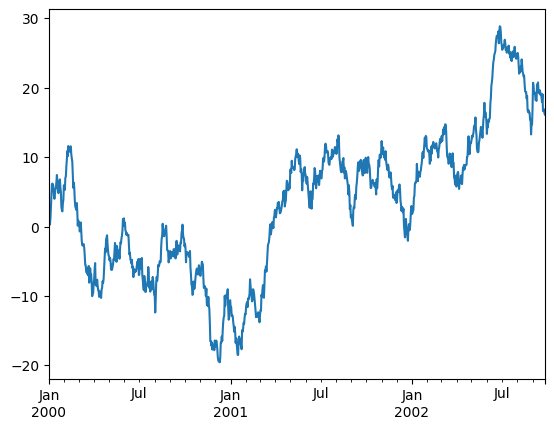

In [5]:
ts.plot()

In [7]:
def get_new_num(xx):
    new_num = xx + 10
    return new_num 

In [10]:
get_new_num(25)

35